# Main Dashboard of PhD experiments in post silicon

In [1]:
%matplotlib inline

import os
from pca.analytics import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

,test_name,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,603.bwaves_s,0.13,96.237,0.28,5.04
1,607.cactuBSSN_s,0.16,71.072,0.37,22.01
2,619.lbm_s,2.28,92.758,0.08,26.26
3,621.wrf_s,1.29,24.804,0.19,10.33
4,627.cam_s,0.69,73.421,0.34,8.30
5,628.pop2_s,0.83,53.197,0.11,8.95
6,638.imagick_s,0.65,49.983,1.32,5.27
7,644.nab_s,2.44,36.855,0.83,2.63
8,649.fotonik3d_s,0.19,94.701,0.15,4.96
9,654.roms_s,0.35,58.811,0.29,8.08


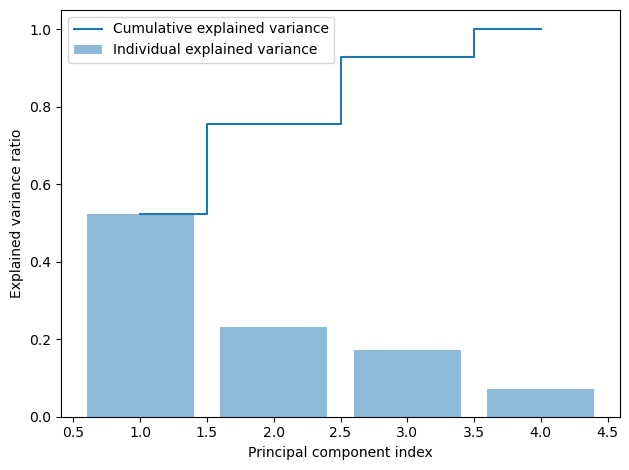

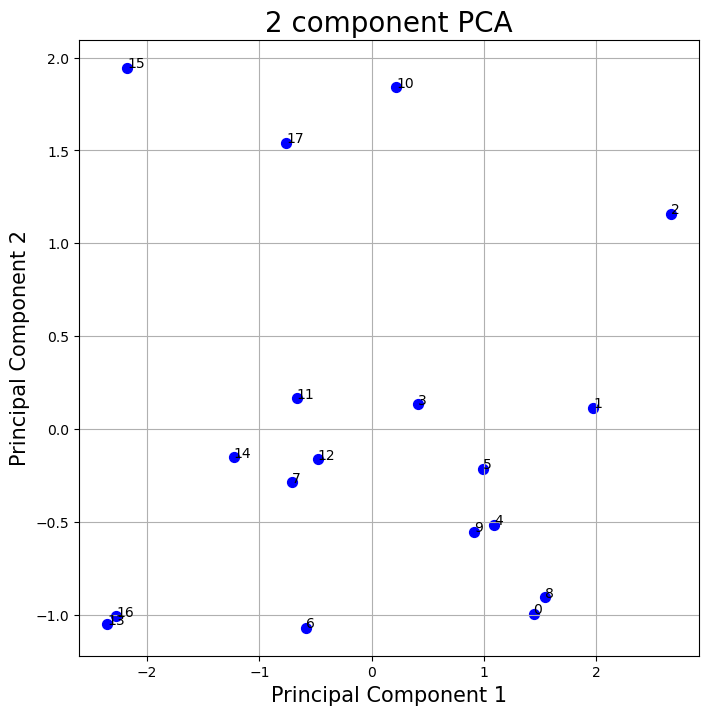

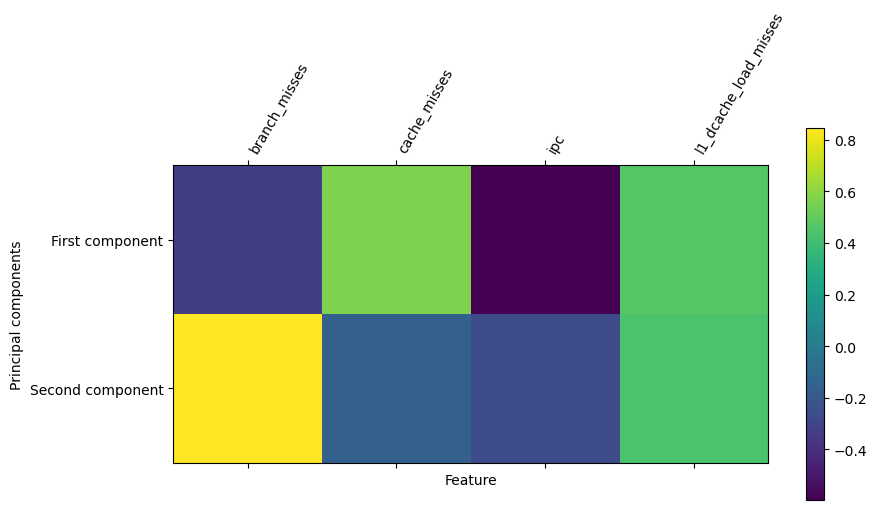

In [2]:
%matplotlib inline

filename = 'post_silicon/summary_phd.csv'
pca_df = None

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_

    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    
    pca_df = get_PCA(df, features, test_column)
else:
    print("Filename error")

# Plot characteristics of the worklaods

<AxesSubplot:xlabel='kind of worklaod'>

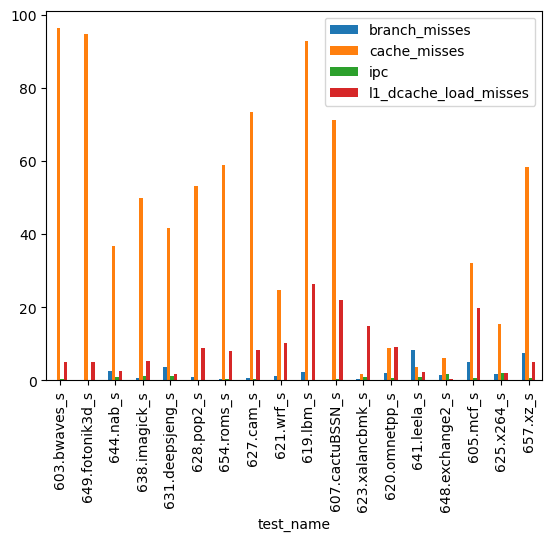

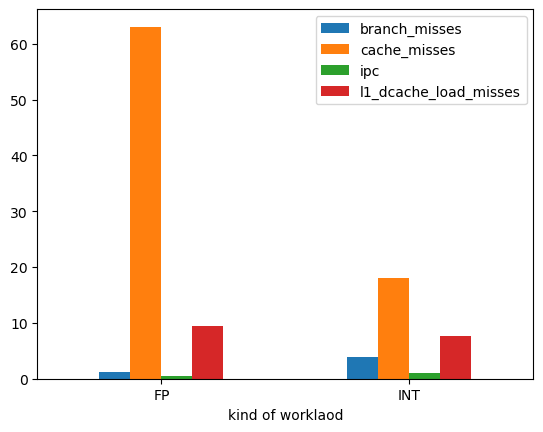

In [15]:

df = pd.read_csv("references/clusters_spec2017.csv")
df_sorted_ref = df.sort_values(by='test_name')

df = pd.read_csv(filename)
df_sorted = df.sort_values(by='test_name')
df_sorted ['kind of worklaod'] = df_sorted_ref['KIND'].tolist()
df_sorted_groups = (df_sorted.sort_values(by='kind of worklaod'))
df_sorted_groups.loc[:, df_sorted_groups.columns != "kind of worklaod"].plot.bar(x="test_name")

df_groups_summary = df_sorted_groups.groupby(['kind of worklaod']).mean()
df_groups_summary.plot.bar(rot=0)



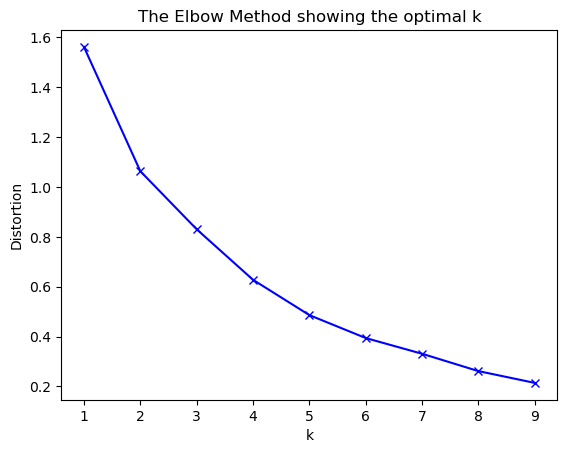

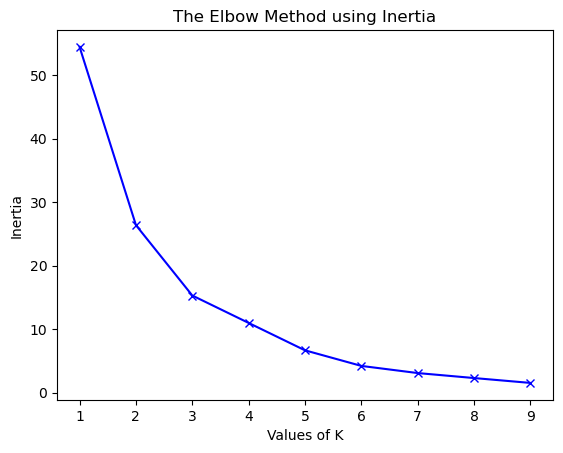

4


In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))


In [5]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 4


## Clasification based on optimal number of clusters

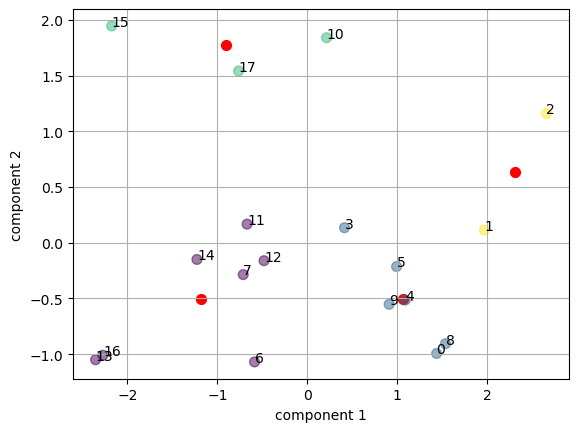

   PRED        test_name
0     0    638.imagick_s
0     0        644.nab_s
0     0    620.omnetpp_s
0     0  623.xalancbmk_s
0     0       625.x264_s
0     0  631.deepsjeng_s
0     0  648.exchange2_s
1     1     603.bwaves_s
1     1        621.wrf_s
1     1        627.cam_s
1     1       628.pop2_s
1     1  649.fotonik3d_s
1     1       654.roms_s
2     2        605.mcf_s
2     2      641.leela_s
2     2         657.xz_s
3     3  607.cactuBSSN_s
3     3        619.lbm_s


In [6]:
df_result,_ = kmean_cluster("pca.csv",clusters)
print(df_result)

## Clasification based on FP/INT clusters

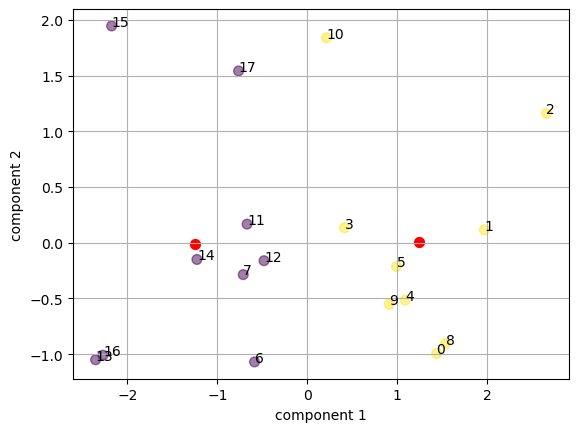

   PRED        test_name
0     0    638.imagick_s
0     0        644.nab_s
0     0    620.omnetpp_s
0     0  623.xalancbmk_s
0     0       625.x264_s
0     0  631.deepsjeng_s
0     0      641.leela_s
0     0  648.exchange2_s
0     0         657.xz_s
1     1     603.bwaves_s
1     1  607.cactuBSSN_s
1     1        619.lbm_s
1     1        621.wrf_s
1     1        627.cam_s
1     1       628.pop2_s
1     1  649.fotonik3d_s
1     1       654.roms_s
1     1        605.mcf_s


In [7]:
df_result,kmeans = kmean_cluster("pca.csv",2)
print(df_result)

## Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}


A = PRED -> 0
cosine_similarity vs fp_tests 0.21081851067789195
cosine_similarity vs int_tests 0.8249579113843053
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.7378647873726218
cosine_similarity vs int_tests 0.1178511301977579
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster


,labels,val_pred,val_true
8,657.xz_s,1,1
16,654.roms_s,0,0
15,649.fotonik3d_s,0,0
7,648.exchange2_s,1,1
1,644.nab_s,1,0
6,641.leela_s,1,1
0,638.imagick_s,1,0
5,631.deepsjeng_s,1,1
14,628.pop2_s,0,0
13,627.cam_s,0,0


,labels,val_pred,val_true
1,644.nab_s,1,0
0,638.imagick_s,1,0
17,605.mcf_s,0,1



adjusted_rand_score 0.41017733230531994

normalized_mutual_info_score 0.35894624660910607

fowlkes_mallows_score 0.6896715738353066

hamming_distance 0.16666666666666666


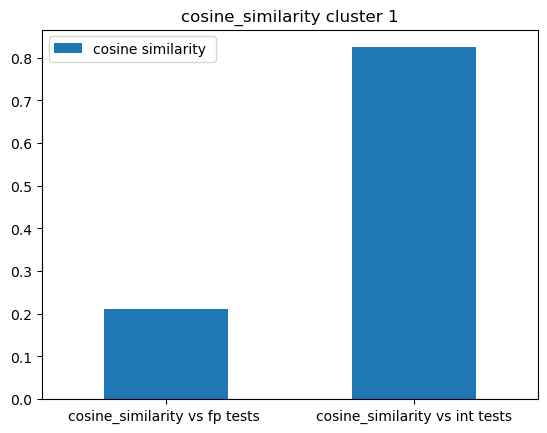

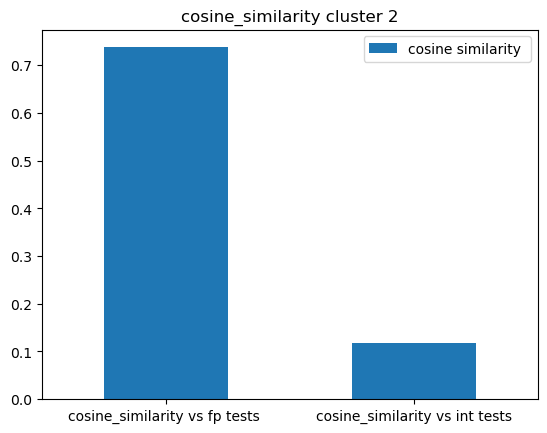

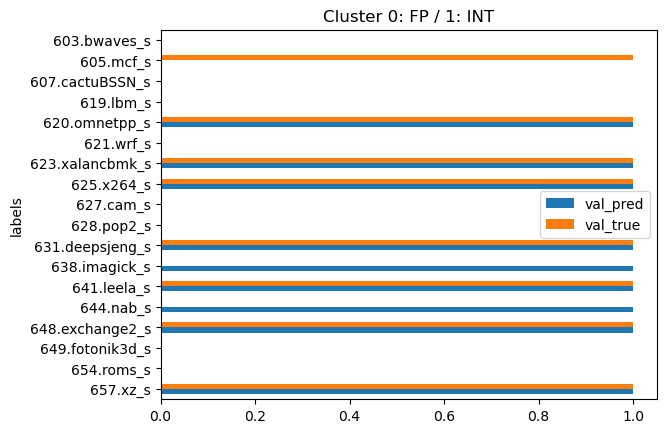

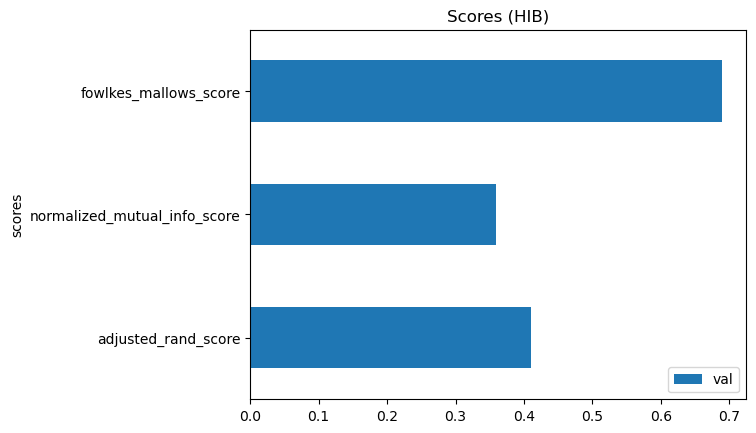

In [8]:
df = pd.read_csv("references/clusters_spec2017.csv")
df_sorted = df.sort_values(by='REAL')
fp_tests = df_sorted[df_sorted['REAL'] == 0]
int_tests = df_sorted[df_sorted['REAL'] == 1]

df = pd.read_csv("clusters.csv")
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pd.read_csv("references/clusters_spec2017.csv")
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["REAL"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})
display(df)
df.to_csv("clusters.csv")

print()
df_ = df.loc[~(df['val_pred'] == df['val_true'])]
display(df_)

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")


scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

# Get the test cases closer to centroid

In [9]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
14,14,-1.226819,-0.149851,631.deepsjeng_s
5,5,0.993906,-0.213617,628.pop2_s
